<script>
    function findAncestor (el, name) {
        while ((el = el.parentElement) && el.nodeName.toLowerCase() !== name);
        return el;
    }
    function colorAll(el, textColor) {
        el.style.color = textColor;
        Array.from(el.children).forEach((e) => {colorAll(e, textColor);});
    }
    function setBackgroundImage(src, textColor) {
        var section = findAncestor(document.currentScript, 'section');
        if (section) {
            section.setAttribute('data-background-image', src);
			if (textColor) colorAll(section, textColor);
        }
    }
</script>

<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-image: linear-gradient(#2774AE,#ebf8e1, #FFD100);
  position: static;
}
</style>

<h1 style='color:white'> Statistics 21 <br/> Python & Other Technologies for Data Science </h1>

<h3 style='color:white'>Vivian Lew, PhD - Wednesday, Week 10</h3>

<script>
    setBackgroundImage('Window1.jpg');
</script>

## Regular Expressions in Python

Regular expressions are powerful and found in nearly every programming language. 

Regular expressions are a sequence of characters which forms a concise and flexible search pattern. 

We use search patterns to check if a string contains the specified search pattern.

The `re` module is part of the Python standard library

In [1]:
import pandas as pd
import re

## Documentation and resources

https://docs.python.org/3/library/re.html

https://learning.oreilly.com/library/view/regular-expressions-cookbook/9781449327453/

https://www.youtube.com/watch?v=K8L6KVGG-7o

https://www.hackerrank.com/domains/regex


## Components of a regular expression broadly classified

- Literal Characters: match the character exactly. So like 'a', 'b', '1', '2', 

- Modifiers: using symbols which change how the regular expression matches text. * "match the preceding character or group zero or more times," + "match the preceding character or group one or more times," and ? means "match the preceding character or group zero or one times." There are also modifiers like {n,m} which means "match the preceding character or group between n and m times."

- Character Classes: match a specific set of characters. Examples: \d match any digit, \w match any alphanumeric character,  . match any character except a newline. And user defined with square brackets [aeiou]. 

### Simplest Example - literal character match

Suppose we have some data:

In [2]:
sgl = ['Tenkū no Shiro Laputa', 'Tonari no Totoro', 'Majo no Takkyūbin', 
       'Mononoke-hime', 'Sen to Chihiro no Kamikakushi', 'Hauru no Ugoku Shiro']

and we want to match the character 'T', then 'T' would be understood as a "regular expression" in this context.  And we would use it with any of the methods in `re`.

https://docs.python.org/3/howto/regex.html#performing-matches

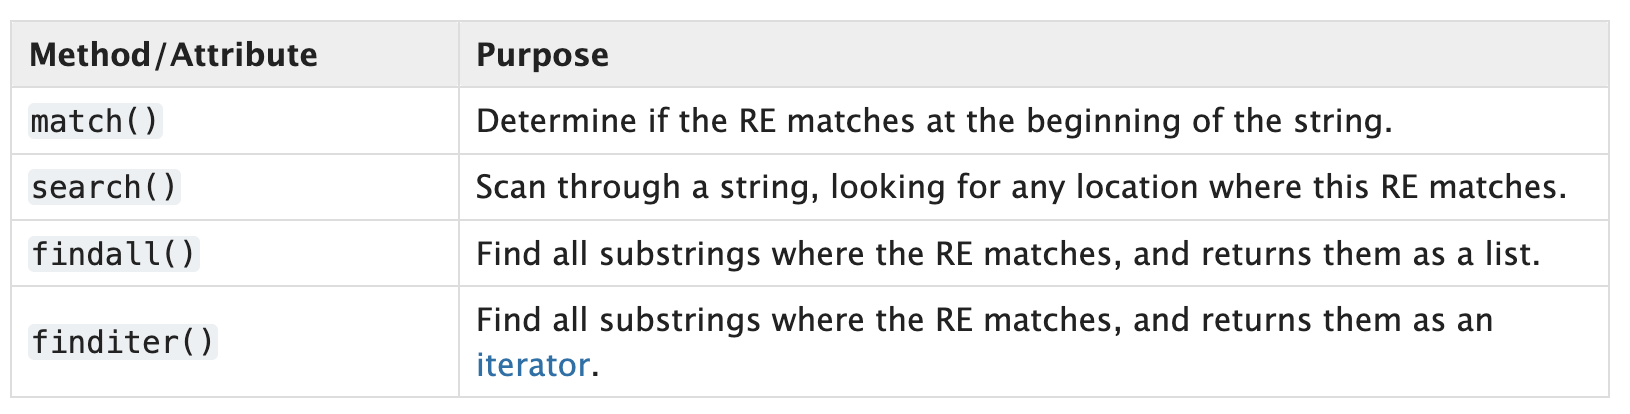

### Application, findall

In [3]:
for word in sgl:
    print(re.findall('T', word))

['T']
['T', 'T']
['T']
[]
[]
[]


### Application, search

In [4]:
res = []
for word in sgl:
    res.append(re.search('T', word))
print(res)
print(res[1])
print(res[1].group())
print(res[1].start())
print(res[1].end())
print(res[1].span())

[<re.Match object; span=(0, 1), match='T'>, <re.Match object; span=(0, 1), match='T'>, <re.Match object; span=(8, 9), match='T'>, None, None, None]
<re.Match object; span=(0, 1), match='T'>
T
0
1
(0, 1)


### Other common methods

In [5]:
text = "Tonari no Totoro"
matches = re.match('To', text)

print("Match found at index:", matches.span())
print("Matched string:", matches.group())

Match found at index: (0, 2)
Matched string: To


In [6]:
matches = re.finditer('To', text)

for match in matches:
    print("Match found at index:", match.span())
    print("Matched string:", match.group())

Match found at index: (0, 2)
Matched string: To
Match found at index: (10, 12)
Matched string: To


### Escape sequence
There are almost always special characters in strings 
To write a regular expression with them, they need to be precented by a "\\" and properly an "r" (for raw string or known as raw string notation)

In [7]:
with open('game4.txt', 'r') as file:
    counter = 0
    for row in file:
        if re.search(r'\(', row):
            print(row)
            counter += 1
            if counter >= 5:
                break

12:00       Nikola Jokic vs. Anthony Davis (Dennis Schroder gains possession) 0     0

10:02       Aaron Gordon makes 19-foot jumper (Nikola Jokic assists)    2     2

9:45        Dennis Schroder makes 25-foot three point jumper (LeBron James assists) 2     5

9:10        Jamal Murray makes 6-foot driving floating jump shot (Nikola Jokic assists)   4     7

8:55        Rui Hachimura makes driving dunk (Austin Reaves assists)    4     9



## Metacharacters 
### (https://docs.python.org/3/library/re.html#re-syntax)

\   Negates the special meaning of character which follows it  
[ ]  Represent a character class  
^   Matches the beginning  
$   Matches the end  
.   Matches any character except newline  
?   Matches zero or one occurrence  
|   Means OR (Matches with any of the characters separated by it.)  
\*   Any number of occurrences (including 0 occurrences)  
\+   One or more occurrences  
{}  Indicate number of occurrences of a preceding RE to match.  
()  Enclose a group of REs  

In [8]:
for word in sgl:
    print(re.findall('k+', word, re.IGNORECASE))

['k']
[]
['kk']
['k']
['K', 'k', 'k']
['k']


COMPARED WITH

In [9]:
for word in sgl:
    print(re.findall('k', word, re.IGNORECASE))

['k']
[]
['k', 'k']
['k']
['K', 'k', 'k']
['k']


### Using the ?

In [10]:
for word in sgl:
    print(re.findall('S?hiro', word, re.IGNORECASE))

['Shiro']
[]
[]
[]
['hiro']
['Shiro']


### Creating a character class - just use [ ]

In [11]:
sgl = ['Tenkū no Shiro Laputa', 'Tonari no Totoro', 'Majo no Takkyūbin', 
       'Mononoke-hime', 'Sen to Chihiro no Kamikakushi', 'Hauru no Ugoku Shiro']
for word in sgl:
    print(re.findall(r'[aeiouy]', word, re.IGNORECASE))

['e', 'o', 'i', 'o', 'a', 'u', 'a']
['o', 'a', 'i', 'o', 'o', 'o', 'o']
['a', 'o', 'o', 'a', 'y', 'i']
['o', 'o', 'o', 'e', 'i', 'e']
['e', 'o', 'i', 'i', 'o', 'o', 'a', 'i', 'a', 'u', 'i']
['a', 'u', 'u', 'o', 'U', 'o', 'u', 'i', 'o']


In [12]:
matches = []
for title in sgl:
    if re.search(r'[MT]', title):
        matches.append(title)
print(matches)

['Tenkū no Shiro Laputa', 'Tonari no Totoro', 'Majo no Takkyūbin', 'Mononoke-hime']


### more combinations

Here matching any t or T at the start of the string

In [13]:
matches = []
for title in sgl:
    if re.findall(r'^t', title, re.IGNORECASE):
         matches.append(title)
print(matches)       

['Tenkū no Shiro Laputa', 'Tonari no Totoro']


Here match any 't' or 'T' at the beginning of a word

In [14]:
matches = []
for title in sgl:
    if re.findall(r'\bt', title, re.IGNORECASE):
          matches.append(title)
print(matches)              

['Tenkū no Shiro Laputa', 'Tonari no Totoro', 'Majo no Takkyūbin', 'Sen to Chihiro no Kamikakushi']


### and more complex

In [15]:
import requests

url = "http://classics.mit.edu/Epictetus/epicench.1b.txt"
response = requests.get(url)

if response.status_code == 200:
    text_content = []
    lines = response.text.split('\n')
    for line in lines[15:]:
        text_content.append(line)
    
    full_text = ' '.join(text_content)

else:
    print(f"Failed to retrieve data from {url}")

In [16]:
matches = re.findall(r'"([^"]*)"', full_text[:4000])
line1, line2 = matches
print(line1)
print(line2)

You are but an appearance, and not absolutely the thing you appear to be.
I will now go bathe, and keep my own mind in a state conformable to nature.


## Using re with pandas

In [17]:
tweets = pd.read_csv("http://www.stat.ucla.edu/~vlew/datasets/tweets_01-08-2021.csv")
tweets.set_index('id')

,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
id,,,,,,,,
98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...,...
1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f
1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f
1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f


In [18]:
counter = 0
for row in tweets['text']:
    if re.findall(r'^[^a-zA-Z0-9_]+\b', row):
        print(row)
        counter += 1
        if counter >= 7:
            break

“I’m running as a proud Democrat, for the Senate”. Sleepy Joe Biden today. It’s only going to get worse. It is not sustainable for our County - China will own us!!!!
“We’ve seen in the last few months, unprecedented amounts of Voter Fraud.” @SenTedCruz  True!
“We are not acting to thwart the Democratic process, we are acting to protect it.” @SenRonJohnson
...AND I WON THE ELECTION. VOTER FRAUD ALL OVER THE COUNTRY! https://t.co/9coP3R44UQ
...The worst polling ever, and then they’ll be back in four years to do it again. This is much more then voter and campaign finance suppression!
...ABC/WaPo had me down 17 points in Wisconsin, the day before the election, and I WON! In Iowa, the polls had us 4 points down, and I won by 8.2%! Fox News and Quinnipiac were wrong on everything...
.@FoxNews, @QuinnipiacPoll, ABC/WaPo, NBC/WSJ were so inaccurate with their polls on me, that it really is tampering with an Election. They were so far off in their polling, and in their attempt to suppress - tha

In [19]:
counter = 0
for row in tweets['text']:
    if re.findall(r'^\d+\b', row):
        print(row)
        counter += 1
        if counter >= 10:
            break

11 DAYS! #MAGA https://t.co/PuqeF1ctDs
100% Correct! https://t.co/ahL2UglMXF
7 DAYS!!!
700,000 ballots were not allowed to be viewed in Philadelphia and Pittsburgh which means, based on our great Constitution, we win the State of Pennsylvania!
3% up in Pennsylvania!
100% True! https://t.co/QWvpzSopkl
3 Points up in Michigan, 2 Points up in Wisconsin, 3 Points up in Pennsylvania. The Great Red Wave is forming, and getting ready to VOTE!
25, wow! I am surprised there are so many. We have just begun to fight. Please send me a list of the 25 RINOS. I read the Fake News Washington Post as little as possible! https://t.co/cEBM0bYuQ9
33.1% GDP - BEST IN USA HISTORY. IF I AM ELECTED, NEXT YEAR WILL BE OUR BEST EVER!
3 days from now, we are going to win Pennsylvania! With your support, we will continue to bring back your jobs, and cut your taxes &amp; regulations. Biden would wipe out your factories, ship your jobs to China, raise your taxes, &amp; eliminate private healthcare!https://t.co/IjvK

### Splitting strings with re

In [20]:
counter = 0
x = re.compile(r'!')
ts = []
for row in tweets['text']:
    if re.findall(r'^\d+\b', row):
        ts.append(x.split(row))
        counter += 1
        if counter >= 10:
            break
print(ts[:2])

[['11 DAYS', ' #MAGA https://t.co/PuqeF1ctDs'], ['100% Correct', ' https://t.co/ahL2UglMXF']]


### subset and substitute with re

In [21]:
with open('game4.txt', 'r') as infile, \
open('filtered_game4.txt', 'w') as outfile:
    for row in infile:
        if re.search(r'LeBron', row):
            new_row = re.sub(r'LeBron', 'King', row)
            outfile.write(new_row)        
            

In [22]:
with open('filtered_game4.txt', 'r') as infile:
    counter = 0
    for row in infile:
        print(row)
        counter += 1
        if counter > 5:
            break

10:44       King James misses 15-foot two point shot      0     2

9:45        Dennis Schroder makes 25-foot three point jumper (King James assists) 2     5

9:26        King James makes free throw 1 of 2      2     6

9:26        King James makes free throw 2 of 2      2     7

8:00        King James bad pass (Jamal Murray steals)     4     11

7:25        King James makes two point shot   7     13



## Challenges

https://www.tsx.com/files/trading/interlisted-companies.txt

https://developers.google.com/edu/pytmyyhon/exercises/baby-names

https://www.hackerrank.com/domains/regex

<h1> Statistics 21 <br/> Have a Good Night! </h1>

<script>
    setBackgroundImage('Window1.jpg', 'black');
</script>